# 智能数据挖掘大作业
作业要求：

针对三个数据集：Cifar10数据集，MIT-Indoor数据集，VOC2012数据集，Travel数据集，选择其中一种数据设计或实现一种基于模式挖掘的算法，要求挖掘出该数据中某一类中具有频繁性又有判别性的图片。对于挖掘算法，可采用传统算法（如：SIFT，HOG，LBP，Bag of Word等），也可采用深度学习算法进行设计。在设计过程中可参考已有的视觉模式挖掘算法。 




In [176]:
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

In [177]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 数据集拆分
VOC数据集包含有2913张图片和6929个目标，为了挖掘某一类的视觉模式，需要先将数据集按类别拆分，这里为了计算简便，选取了{'car', 'horse', 'cat', 'dog', 'bird', 'sheep', 'cow'}共7个类别。

In [ ]:
import shutil
import os
import xml.etree.ElementTree as ET

Annotations_path = "VOC2012/Annotations"
image_path = "VOC2012/JPEGImages"
save_img_path = "VOC2012/after/"
classes = ['car', 'horse', 'cat', 'dog', 'bird', 'sheep', 'cow']


def get_my_classes(Annotations_path, image_path, save_img_path, classes):
    xml_path = os.listdir(Annotations_path)
    for i in classes:
        if not os.path.exists(save_img_path+"/"+i):
            os.mkdir(save_img_path+i)
    for xmls in xml_path:
        print(Annotations_path+"/"+xmls)
        in_file = open(os.path.join(Annotations_path, xmls))
        print(in_file)
        tree = ET.parse(in_file)
        root = tree.getroot()
        # 这里是要求每一个图片只能有单独的一个类
        if len(set(root.iter('object'))) != 1:
            continue
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            print(cls_name)
        try:
            shutil.copy(
                image_path+"/"+xmls[:-3]+"jpg", save_img_path+"/"+cls_name+"/"+xmls[:-3]+"jpg")
        except:
            continue

get_my_classes(Annotations_path, image_path, save_img_path, classes)

VOC2012/Annotations/2007_000027.xml
<_io.TextIOWrapper name='VOC2012/Annotations\\2007_000027.xml' mode='r' encoding='cp936'>
person
VOC2012/Annotations/2007_000032.xml
<_io.TextIOWrapper name='VOC2012/Annotations\\2007_000032.xml' mode='r' encoding='cp936'>
VOC2012/Annotations/2007_000033.xml
<_io.TextIOWrapper name='VOC2012/Annotations\\2007_000033.xml' mode='r' encoding='cp936'>
VOC2012/Annotations/2007_000039.xml
<_io.TextIOWrapper name='VOC2012/Annotations\\2007_000039.xml' mode='r' encoding='cp936'>
tvmonitor
VOC2012/Annotations/2007_000042.xml
<_io.TextIOWrapper name='VOC2012/Annotations\\2007_000042.xml' mode='r' encoding='cp936'>
VOC2012/Annotations/2007_000061.xml
<_io.TextIOWrapper name='VOC2012/Annotations\\2007_000061.xml' mode='r' encoding='cp936'>
VOC2012/Annotations/2007_000063.xml
<_io.TextIOWrapper name='VOC2012/Annotations\\2007_000063.xml' mode='r' encoding='cp936'>
VOC2012/Annotations/2007_000068.xml
<_io.TextIOWrapper name='VOC2012/Annotations\\2007_000068.xml' mo

# 图像裁剪

从图像中随机采样图像块

In [97]:
# 定义待批量裁剪图像的路径地址
IMAGE_INPUT_PATH = 'VOC2012/after/sheep'
# 定义裁剪后的图像存放地址
IMAGE_OUTPUT_PATH = 'sheep'

for each_image in os.listdir(IMAGE_INPUT_PATH):
    # 每个图像全路径
    image_input_fullname = IMAGE_INPUT_PATH + "/" + each_image
    # 利用PIL库打开每一张图像
    img = Image.open(image_input_fullname)
    # 定义裁剪图片左、上、右、下的像素坐标
    x_max = img.size[0]
    y_max = img.size[1]
    mid_point_x = int(x_max/2)
    mid_point_y = int(y_max/2)
    for i in range(0, 10):
        # 中心点随机偏移
        crop_x = mid_point_x + \
            random.randint(int(-mid_point_x/3), int(mid_point_x/3))
        crop_y = mid_point_y + \
            random.randint(int(-mid_point_y/3), int(mid_point_y/3))
        dis_x = x_max-crop_x
        dis_y = y_max-crop_y
        dis_min = min(dis_x, dis_y, crop_x, crop_y)  # 获取变动范围
        down = crop_y + dis_min
        up = crop_y - dis_min
        right = crop_x + dis_min
        left = crop_x - dis_min
        BOX_LEFT, BOX_UP, BOX_RIGHT, BOX_DOWN = left, up, right, down
        # 从原始图像返回一个矩形区域，区域是一个4元组定左上右下像素坐标
        box = (BOX_LEFT, BOX_UP, BOX_RIGHT, BOX_DOWN)
        # 进行roi裁剪
        roi_area = img.crop(box)
        # 裁剪后每个图像的路径+名称
        image_output_fullname = IMAGE_OUTPUT_PATH + \
            "/" + str(i) + "_" + each_image
        # 存储裁剪得到的图像
        roi_area.save(image_output_fullname)

# Hog特征提取

In [4]:
from skimage.feature import hog
import cv2

In [5]:
# 提取hog特征
def extract_hog_features(X):
    image_descriptors = []
    for i in range(len(X)):
        '''
        参数解释：
        orientations：方向数
        pixels_per_cell：胞元大小
        cells_per_block：块大小
        block_norm：可选块归一化方法L2-Hys(L2范数)
        visualize：可视化
        '''
        fd, _ = hog(X[i], orientations=9, pixels_per_cell=(
            16, 16), cells_per_block=(16, 16), block_norm='L2-Hys', visualize=True)
        image_descriptors.append(fd)  # 拼接得到所有图像的hog特征
    return image_descriptors        # 返回的是训练部分所有图像的hog特征

In [6]:
# 图片预处理
def preprocessing(src):
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)  # 将图像转换成灰度图
    img = cv2.resize(gray, (256, 256))  # 尺寸调整g
    img = img/255.0    # 数据归一化
    return img

In [55]:
# 读取图像
def read_data(path):       # label2id为定义的标签
    X = []
    # os.listdir用于返回指定的文件夹包含的文件或文件夹的名字的列表，此处遍历每个文件夹
    for img_file in os.listdir(path):
        image = cv2.imread(os.path.join(path, img_file))        # 读取图像
        if image is not None:
            result = preprocessing(image)
            # 将读取到的所有图像的矩阵形式拼接在一起
            X.append(result)
    return X

这里选择挖掘sheep类别的视觉模式

In [8]:
X = read_data('./sheep')
X_features = extract_hog_features(X)

In [98]:
Car_feature = extract_hog_features(read_data('./car'))
Horse_feature = extract_hog_features(read_data('./horse'))
Cat_feature = extract_hog_features(read_data('./cat'))
Dog_feature = extract_hog_features(read_data('./dog'))
Bird_feature = extract_hog_features(read_data('./bird'))
Cow_feature = extract_hog_features(read_data('./cow'))

# 方法一：根据余弦相似性进行挖掘

In [153]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

threshold = 0.6
group1 = []
group2 = []
group1.append(X_features[0])
for i in range(1, len(X_features)):
    res = cosine_similarity(X_features[0].reshape(1, -1), X_features[i].reshape(1, -1))
    if res > threshold:
        group1.append(X_features[i])
    else:
        group2.append(X_features[i])

In [154]:
# 计算频繁性
frequency = max(len(group1), len(group2))/len(X_features)
print("频繁性为"+str(frequency))

频繁性为0.6230769230769231


In [157]:
# 求模式特征的均值
pattern = np.mean(group1, 0)

In [158]:
# 计算各类错误率
# car
car_error = 0
for i in range(len(Cow_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Car_feature[i].reshape(1, -1))
    if res > threshold:
        car_error += 1
# horse
horse_error = 0
for i in range(len(Horse_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Horse_feature[i].reshape(1, -1))
    if res > threshold:
        horse_error += 1
# cat
cat_error = 0
for i in range(len(Cat_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Cat_feature[i].reshape(1, -1))
    if res > threshold:
        cat_error += 1
# dog
dog_error = 0
for i in range(len(Dog_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Dog_feature[i].reshape(1, -1))
    if res > threshold:
        dog_error += 1
# bird
bird_error = 0
for i in range(len(Bird_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Bird_feature[i].reshape(1, -1))
    if res > threshold:
        bird_error += 1
# cow
cow_error = 0
for i in range(len(Cow_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Cow_feature[i].reshape(1, -1))
    if res > threshold:
        cow_error += 1

In [159]:
# 计算判别性
discr_car = (len(Car_feature)-car_error)/len(Car_feature)
discr_horse = (len(Horse_feature)-horse_error)/len(Horse_feature)
discr_cat = (len(Cat_feature)-cat_error)/len(Cat_feature)
discr_dog = (len(Dog_feature)-dog_error)/len(Dog_feature)
discr_bird = (len(Bird_feature)-bird_error)/len(Bird_feature)
discr_cow = (len(Cow_feature)-cow_error)/len(Cow_feature)
discr_mean = (discr_car+discr_horse+discr_cat+discr_dog+discr_bird+discr_cow)/6
print("car类上的判别性为" + str(discr_car))
print("horse类上的判别性为" + str(discr_horse))
print("cat类上的判别性为" + str(discr_cat))
print("dog类上的判别性为" + str(discr_dog))
print("bird类上的判别性为" + str(discr_bird))
print("cow类上的判别性为" + str(discr_cow))
print("平均判别性为" + str(discr_mean))

car类上的判别性为0.8878472222222222
horse类上的判别性为0.2911392405063291
cat类上的判别性为0.31543624161073824
dog类上的判别性为0.25806916426512966
bird类上的判别性为0.48996478873239435
cow类上的判别性为0.14471544715447154
平均判别性为0.39786201741521415


# 方法二：使用K-means聚类方法进行挖掘

In [160]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2, random_state=0)
y = cluster.fit_predict(X_features)

## 聚类可视化

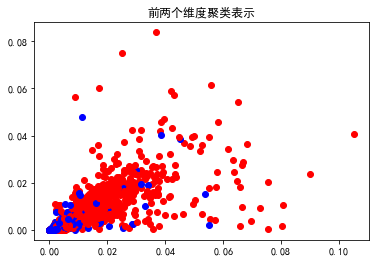

In [182]:
colors = ['blue', 'red']
plt.figure()
for i in range(len(y)):
    plt.scatter(X_features[i][0], X_features[i][1], color=colors[y[i]])
plt.title("前两个维度聚类表示")
plt.savefig("cluster.png")
plt.show()

In [164]:
# 计算频繁性
frequency = sum(y)/len(y)
print("频繁性为"+str(frequency))

频繁性为0.7076923076923077


In [166]:
group1 = []
group2 = []
for i in range(len(y)):
    if y[i] == 1:
        group1.append(X_features[i])
    else:
        group2.append(X_features[i])

In [169]:
# 求模式特征的均值
pattern = np.mean(group1, 0)

In [174]:
# 计算各类错误率
threshold = 0.8
# car
car_error = 0
for i in range(len(Cow_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Car_feature[i].reshape(1, -1))
    if res > threshold:
        car_error += 1
# horse
horse_error = 0
for i in range(len(Horse_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Horse_feature[i].reshape(1, -1))
    if res > threshold:
        horse_error += 1
# cat
cat_error = 0
for i in range(len(Cat_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Cat_feature[i].reshape(1, -1))
    if res > threshold:
        cat_error += 1
# dog
dog_error = 0
for i in range(len(Dog_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Dog_feature[i].reshape(1, -1))
    if res > threshold:
        dog_error += 1
# bird
bird_error = 0
for i in range(len(Bird_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Bird_feature[i].reshape(1, -1))
    if res > threshold:
        bird_error += 1
# cow
cow_error = 0
for i in range(len(Cow_feature)):
    res = cosine_similarity(pattern.reshape(1, -1), Cow_feature[i].reshape(1, -1))
    if res > threshold:
        cow_error += 1

In [175]:
# 计算判别性
discr_car = (len(Car_feature)-car_error)/len(Car_feature)
discr_horse = (len(Horse_feature)-horse_error)/len(Horse_feature)
discr_cat = (len(Cat_feature)-cat_error)/len(Cat_feature)
discr_dog = (len(Dog_feature)-dog_error)/len(Dog_feature)
discr_bird = (len(Bird_feature)-bird_error)/len(Bird_feature)
discr_cow = (len(Cow_feature)-cow_error)/len(Cow_feature)
discr_mean = (discr_car+discr_horse+discr_cat+discr_dog+discr_bird+discr_cow)/6
print("car类上的判别性为" + str(discr_car))
print("horse类上的判别性为" + str(discr_horse))
print("cat类上的判别性为" + str(discr_cat))
print("dog类上的判别性为" + str(discr_dog))
print("bird类上的判别性为" + str(discr_bird))
print("cow类上的判别性为" + str(discr_cow))
print("平均判别性为" + str(discr_mean))

car类上的判别性为0.9875
horse类上的判别性为0.7930379746835443
cat类上的判别性为0.9102013422818792
dog类上的判别性为0.8435158501440922
bird类上的判别性为0.8797535211267605
cow类上的判别性为0.724390243902439
平均判别性为0.8563998220231192
